# Xử lý ngôn ngữ tự nhiên - Natural Language Processing

Các đánh giá của thực khách đến nhà hàng là một phần quan trọng để phát triển nhà hàng. Dựa trên đánh giá này nhà hàng có thể đưa ra các cải tiến phù hợp cho sau này. Tuy nhiên, có nhiều loại đánh giá khác nhau, chúng ta cần phân loại chúng để xử lý.

Dữ liệu được cung cấp bao gồm các các nhận xét của thực khách về nhà hàng và được phân làm hai loại thích và không thích.


**Yêu cầu:**
1. Tạo tập dữ liệu từ dữ liệu thô (**Restaurant_Reviews.csv**):
    - Làm sạch dữ liệu (có thể dùng thư viện nltk để hỗ trợ), dùng wordcloud để visualize dữ liệu, chia dữ liệu ra làm 2 phần huấn luyện, kiểm ra với tỉ lệ 8:2
    - Dùng mô hình Bags of Words để huyển dữ liệu về dạng vector
    - Chia tập dữ liệu thành 2 phần để huấn luyện và kiểm tra mô hình
3. Dùng mô hình Naive Bayes để phân loại các đánh giá


## Cài đặt một số thư viện phổ biến

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Cài đặt dữ liệu

In [4]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

## Làm sạch dữ liệu

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk, re
nltk.download('stopwords')
n_sample = len(dataset)
corpus = []
for i in range(n_sample):
  review = re.sub('[^a-zA-Z]', " ", dataset["Review"].iloc[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review]
  review = " ".join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(corpus)

['wow love thi place', 'crust is not good', 'not tasti and the textur wa just nasti', 'stop by dure the late may bank holiday off rick steve recommend and love it', 'the select on the menu wa great and so were the price', 'now i am get angri and i want my damn pho', 'honeslti it didn t tast that fresh', 'the potato were like rubber and you could tell they had been made up ahead of time be kept under a warmer', 'the fri were great too', 'a great touch', 'servic wa veri prompt', 'would not go back', 'the cashier had no care what so ever on what i had to say it still end up be wayyy overpr', 'i tri the cape cod ravoli chicken with cranberri mmmm', 'i wa disgust becaus i wa pretti sure that wa human hair', 'i wa shock becaus no sign indic cash onli', 'highli recommend', 'waitress wa a littl slow in servic', 'thi place is not worth your time let alon vega', 'did not like at all', 'the burritto blah', 'the food amaz', 'servic is also cute', 'i could care less the interior is just beauti', 's

In [8]:
from wordcloud import WordCloud
def create_wordcloud(list_sample):
  text = " ".join(cat for cat in list_sample)
  word_cloud = WordCloud(width=3000, height=2000, random_state=42, collocations = False, background_color = 'white', stopwords=all_stopwords).generate(text)
  plt.imshow(word_cloud)
  plt.axis('off')
  plt.show()

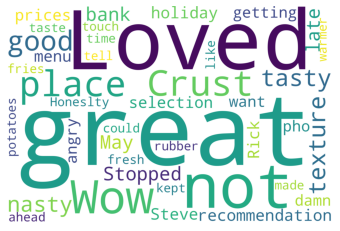

In [9]:
create_wordcloud(dataset.Review[:10])

## Tạo mô hình Bag of Words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 1500)
y_train shape: (800,)
X_test shape: (200, 1500)
y_test shape: (200,)


## Huấn luyện Naive Bayes model trên dữ liệu

In [12]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

## Dự đoán kết quả trên dữ liệu kiểm tra

In [13]:
y_pred = clf.predict(X_test)

## Đánh giá kết quả dự đoán bằng Confusion Matrix

Classificatin Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.68        87
           1       0.74      0.87      0.80       113

    accuracy                           0.76       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.76      0.75       200

Confusion Matrix:


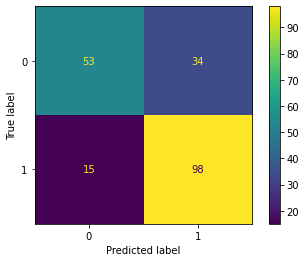

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("Classificatin Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()